# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import normalize

In [2]:
Forcast=pd.read_csv('/Users/Asus/Documents/InternCsv/Forcast_Official.csv')

In [3]:
Forcast.head(4)

,Unnamed: 0,Plant,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,Date
0,0,WPS,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,47.241,47.241,0.000,0.000,0.000,0.000,0.000,10.000,10.000,2020 - 07 - 10
1,1,Canyon,28.065,11.040,11.040,0.000,0.000,0.000,0.000,0.000,...,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,19.700,2020 - 07 - 10
2,2,Olax,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,...,54.000,38.820,10.000,10.000,10.000,10.000,10.000,10.000,10.000,2020 - 07 - 10
3,3,Nlax,60.472,60.472,60.472,60.472,60.472,60.472,60.472,60.472,...,71.915,60.472,60.472,60.472,60.472,60.472,60.472,60.472,60.472,2020 - 07 - 10


In [4]:
#Renaming the Unnamed Column into Plants and creating and Index
Forcast = Forcast.rename(columns={'Unnamed: 0': 'Plants'})

In [7]:
Forcast.drop('Plants',inplace=True,axis=1)

In [8]:
#Forcast.head(2)

,Plant,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,Date
0,WPS,0.000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,47.241,47.241,0.0,0.0,0.0,0.0,0.0,10.0,10.0,2020 - 07 - 10
1,Canyon,28.065,11.04,11.04,0.0,0.0,0.0,0.0,0.0,11.04,...,30.000,30.000,30.0,30.0,30.0,30.0,30.0,30.0,19.7,2020 - 07 - 10


In [9]:
Forcast.drop('Date',inplace=True,axis=1)

In [11]:
Plant_Forcast=Forcast.groupby(["Plant"])

In [12]:
Plant_Sum=Plant_Forcast.sum()

In [15]:
Plant_Sum["Total_Dispatch"] = Plant_Sum.sum(axis=1)

In [16]:
Plant_Sum.head(5)

,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,04:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,Total_Dispatch
Plant,,,,,,,,,,,,,,,,,,,,,
ACE EMBP,664.59440,491.6603,443.6441,455.0947,434.8058,402.7511,367.7511,349.7511,418.422,497.9831,...,1989.0882,1999.0433,1986.4342,1925.7379,1916.2499,1872.5425,1764.61210,1491.7185,799.6197,146886.27580
ACE Matara,48.00000,24.0000,16.0000,24.0000,16.0000,16.0000,16.0000,16.0000,16.000,49.3920,...,483.7350,467.7350,467.7350,443.7350,435.7350,394.7160,314.91000,225.8470,184.0000,32128.02800
ALTAQQA-Mahi.,0.13437,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,...,10.0000,10.0000,10.0000,10.0000,10.0000,0.0000,0.00000,0.0000,0.0000,660.26874
ALTAQQA-Pol.,8.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,...,8.0000,8.0000,8.0000,8.0000,8.0000,0.0000,0.11088,0.0000,0.0000,544.22176
Asia Power,42.00000,42.0000,40.0620,42.0000,32.9000,32.9000,32.9000,32.9000,62.400,110.9000,...,742.5000,742.5000,733.1000,728.4000,724.5000,704.2223,628.30000,406.7665,352.2000,53906.06440


In [17]:
Plant_Sum.shape

(37, 49)

In [18]:
Plant_Sum.reset_index(level=0,inplace=True)

In [19]:
Plant_Sum.head(3)

,Plant,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,Total_Dispatch
0,ACE EMBP,664.59440,491.6603,443.6441,455.0947,434.8058,402.7511,367.7511,349.7511,418.422,...,1989.0882,1999.0433,1986.4342,1925.7379,1916.2499,1872.5425,1764.6121,1491.7185,799.6197,146886.27580
1,ACE Matara,48.00000,24.0000,16.0000,24.0000,16.0000,16.0000,16.0000,16.0000,16.000,...,483.7350,467.7350,467.7350,443.7350,435.7350,394.7160,314.9100,225.8470,184.0000,32128.02800
2,ALTAQQA-Mahi.,0.13437,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,...,10.0000,10.0000,10.0000,10.0000,10.0000,0.0000,0.0000,0.0000,0.0000,660.26874


In [20]:
Plant_Sum.shape

(37, 50)

## Define X & Y

In [26]:
x=Plant_Sum.iloc[:,1:48].values
y=Plant_Sum.iloc[:,49].values

In [27]:
x

array([[6.6459440e+02, 4.9166030e+02, 4.4364410e+02, ..., 1.8725425e+03,
        1.7646121e+03, 1.4917185e+03],
       [4.8000000e+01, 2.4000000e+01, 1.6000000e+01, ..., 3.9471600e+02,
        3.1491000e+02, 2.2584700e+02],
       [1.3437000e-01, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [3.0853320e+02, 2.8086620e+02, 2.7569000e+02, ..., 1.8271900e+02,
        1.0995000e+02, 1.0995000e+02],
       [4.2781550e+03, 4.3927960e+03, 4.3489890e+03, ..., 5.6700000e+03,
        5.6700000e+03, 5.4000000e+03],
       [1.3365800e+02, 8.2960000e+01, 1.0000000e+01, ..., 1.7573600e+02,
        7.4297000e+01, 8.0000000e+01]])

In [28]:
y

array([1.46886276e+05, 3.21280280e+04, 6.60268740e+02, 5.44221760e+02,
       5.39060644e+04, 1.43792138e+05, 2.30399880e+04, 2.37244200e+03,
       4.03624600e+04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.86438928e+04, 1.00577504e+05, 6.96639540e+05, 6.97220000e+05,
       6.92596000e+05, 0.00000000e+00, 1.24386176e+05, 6.45999900e+04,
       1.07784313e+05, 6.44655100e+04, 3.25500000e+04, 3.48798700e+04,
       1.17472798e+05, 1.59459932e+05, 1.17870000e+05, 7.31822780e+04,
       8.18252600e+04, 3.48323786e+04, 2.83661600e+03, 3.10236010e+03,
       1.07727905e+04, 7.46310516e+03, 4.07255986e+04, 5.25150074e+05,
       2.60453700e+04])

## Split the dataset in training Set & test Set

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [31]:
reg= linear_model.LinearRegression()
reg.fit(Plant_Sum.iloc[:,1:48],Plant_Sum['Total_Dispatch'])

LinearRegression()

In [32]:
reg.coef_

array([ 1.95341237,  4.51513947, -0.22532265,  4.24867264,  0.89732042,
        2.05370263,  1.46362105,  2.90159469,  0.44418706,  3.58457014,
        0.97637544,  0.94276352,  2.70368241,  1.3997183 ,  1.57194467,
        2.51212711,  2.22890608,  2.45498878,  1.35231488,  2.18706903,
        1.42461422,  2.10708904,  0.47920357,  3.37405983,  0.70872976,
        3.31305058,  3.74627882,  3.08315074,  0.13415739,  2.71710522,
       -1.61639587,  1.72494305,  3.01537344,  4.02373498,  3.26413886,
        0.93213031,  2.20420704,  1.58543116,  3.53436082,  1.70680144,
        0.63470122,  2.18735908,  0.22492308,  4.13796344, -0.04526312,
        5.31613508,  1.92510161])

In [33]:
reg.intercept_

-4.3655745685100555e-11

## Evaluate Model

In [35]:
y_pred=ml.predict(x_test)
print(y_pred)

[ 3.20537872e+04  1.07711283e+05  6.92569119e+05 -5.82076609e-11
  3.10851249e+03  8.07145374e+04  6.97191018e+05 -5.82076609e-11
  6.59475187e+02  1.59279582e+05  2.89371833e+03  1.07751957e+04]


In [36]:
from sklearn.metrics import r2_score
r2_score (y_test,y_pred)         #High Accurcay Rate can Be Gain From the Model

0.9999979536526534

## Plotting Predicting Model with Actual Model

Text(0.5, 1.0, 'Actual Vs. Predicted')

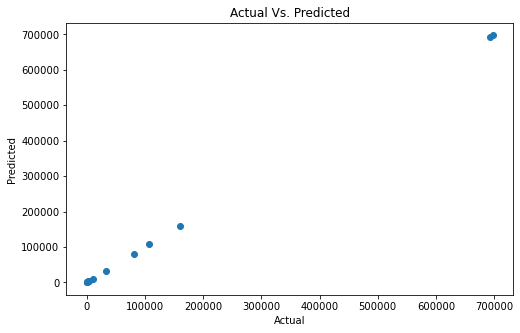

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred)
myline = np.linspace(0, 10, 100)
#plt.plot(myline, my_model(myline), color ="r")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs. Predicted')  #With The Accuracy is Very High Prediction and Actual Values are Almost Similar

## Model Value Differances

In [41]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Differance':y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted value,Differance
0,32550.00000,3.205379e+04,4.962128e+02
1,107784.31300,1.077113e+05,7.303025e+01
2,692596.00000,6.925691e+05,2.688077e+01
3,0.00000,-5.820766e-11,5.820766e-11
4,3102.36010,3.108512e+03,-6.152386e+00
5,81825.26000,8.071454e+04,1.110723e+03
6,697220.00000,6.971910e+05,2.898176e+01
7,0.00000,-5.820766e-11,5.820766e-11
8,660.26874,6.594752e+02,7.935526e-01
9,159459.93240,1.592796e+05,1.803500e+02


## Data Normalization in Plant_Sum

In [43]:
Plant_Sum = normalize(Plant_Sum.iloc[:,1:49] , axis=0) #Without using normalization first dataset importing mechanism can be used

In [47]:
Plant_Sum

array([[4.90968904e-02, 3.62846720e-02, 3.28620697e-02, ...,
        1.22595342e-01, 1.05058775e-01, 5.69555867e-02],
       [3.54599849e-03, 1.77120693e-03, 1.18516873e-03, ...,
        2.18781789e-02, 1.59059563e-02, 1.31060152e-02],
       [9.92657952e-06, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.27928804e-02, 2.07280066e-02, 2.04211980e-02, ...,
        7.63870875e-03, 7.74356043e-03, 7.83155638e-03],
       [3.16048566e-01, 3.24189612e-01, 3.22142861e-01, ...,
        3.93919769e-01, 3.80311290e-01, 3.72737922e-01],
       [9.87398054e-03, 6.12247194e-03, 7.40730456e-04, ...,
        5.16173846e-03, 5.63424134e-03, 2.84913374e-03]])

In [50]:
from numpy import genfromtxt
x1=Plant_Sum[1:,0:47]
y1=Plant_Sum[1:,47]
print(x1[0:10])
print(y1[0:10])

[[3.54599849e-03 1.77120693e-03 1.18516873e-03 1.78255753e-03
  1.19111467e-03 1.19434565e-03 1.19293263e-03 1.19163354e-03
  1.18041800e-03 3.57079806e-03 5.68084424e-03 2.34971631e-02
  2.76950084e-02 2.94150238e-02 2.73161014e-02 2.98801636e-02
  3.03769989e-02 3.04999714e-02 3.05094914e-02 3.04325658e-02
  3.04203222e-02 3.02994814e-02 3.01441029e-02 3.00852042e-02
  3.01618750e-02 2.97668789e-02 3.04800946e-02 3.05012717e-02
  3.04414533e-02 3.03297885e-02 3.03414581e-02 3.02666662e-02
  3.02185715e-02 3.02356261e-02 3.02827483e-02 3.02403799e-02
  2.97521541e-02 2.98137412e-02 3.11649169e-02 3.10227730e-02
  3.04612171e-02 3.09093448e-02 2.97032803e-02 2.95786224e-02
  2.72147585e-02 2.18781789e-02 1.59059563e-02]
 [9.92657952e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 6.99320331e-04
  6.93404916e-04 6.94007540e-04 6.94336521e-04 6.90055533e-04
  6.88558530e-04 6.832

### Analyzing Training Curve in Plant_Sum

In [51]:
def gradient(x1,y1,alpha,epoch):
  m=x1.shape[0]  #number of samples
  ones = np.ones((m,1))
  x1=np.concatenate((ones,x1),axis=1)
  n=x1.shape[1]
  Theta = np.ones(n) #n = 5th parameter
  h = np.dot(x1, Theta) #Compute Hypothesis

  #Gradient descent Algorithm
  cost = np.ones(epoch)
  for i in range (0,epoch):
      Theta[0] = Theta[0] - (alpha/ x1.shape[0]) * sum(h-y1)
      for j in range(1,n):
        Theta[j] = Theta[j] - (alpha/ x1.shape[0]) * sum((h-y1) * x1[:, j])
      h = np.dot(x1,Theta)
      cost[i] = 1/(2*m) * sum(np.square(h-y1)) #compute Cost
  return cost, Theta 

In [52]:
#Calcualting Theta & Cost
cost, Theta = gradient(x1, y1, 0.005, 2000)
print(Theta)

[-4.27037795e-02 -2.78030322e-03 -7.01235062e-03 -9.14424421e-03
 -1.07766942e-02 -1.07528665e-02 -1.10711805e-02 -1.24159744e-02
 -1.28940119e-02 -1.23870492e-02 -1.00236121e-02 -4.88920098e-06
  1.06622033e-02  1.83829834e-02  1.66703424e-02  1.19365529e-02
  1.46054517e-02  2.09330776e-02  2.67902574e-02  2.96023916e-02
  3.11021513e-02  3.10149870e-02  3.56007260e-02  4.07416058e-02
  4.26516840e-02  4.04776422e-02  3.45633220e-02  2.86759426e-02
  2.75963285e-02  3.02790451e-02  3.41207374e-02  3.30892621e-02
  3.60989580e-02  3.78669990e-02  3.68915210e-02  3.25895204e-02
  3.03460690e-02  4.14642363e-02  7.86035263e-02  1.02159757e-01
  9.08501502e-02  7.07413664e-02  5.58070163e-02  4.01070879e-02
  2.71471409e-02  1.51860597e-02  8.29495855e-03  1.49291187e-03]


## Training Data Cost in Each Plants in the Forcast Table

Lowest Cost =0.0005811410646404037


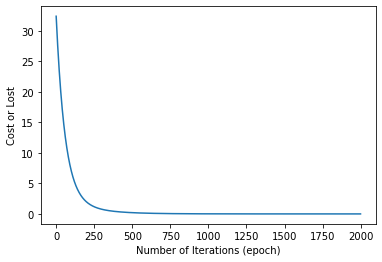

In [53]:
plt.plot(cost)
plt.xlabel('Number of Iterations (epoch)')
plt.ylabel("Cost or Lost")
plt.show
print("Lowest Cost ="+ str(np.min(cost)))
#Computation Cost Of Data Training
#print("Cost after 10 iterations =" + str(cost[-1]))